In [75]:
!pip install mlxtend 

In [76]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
!pip install mlxtend

In [79]:
movies=pd.read_csv('my_movies.csv')
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [80]:
df=pd.get_dummies(movies)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [105]:
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x:len(x))
frequent_itemsets

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.6,(Patriot),1
3,0.6,(V1_Gladiator),1
4,0.6,(V2_Patriot),1
...,...,...,...
58,0.4,"(Patriot, Gladiator, V3_Sixth Sense, Sixth Sen...",5
59,0.4,"(Gladiator, V3_Sixth Sense, V1_Gladiator, Sixt...",5
60,0.4,"(Patriot, V3_Sixth Sense, V1_Gladiator, Sixth ...",5
61,0.4,"(Patriot, Gladiator, V3_Sixth Sense, V1_Gladia...",5


In [96]:
frequent_itemsets = apriori(df, min_support=0.7, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.7,(Gladiator)


In [106]:
frequent_itemsets[ (frequent_itemsets['length'] == 4) & (frequent_itemsets['support'] >=0.4)]

,support,itemsets,length
41,0.4,"(Sixth Sense, Patriot, V1_Gladiator, Gladiator)",4
42,0.4,"(Sixth Sense, V2_Patriot, Patriot, Gladiator)",4
43,0.4,"(Sixth Sense, Patriot, Gladiator, V3_Sixth Sense)",4
44,0.4,"(Sixth Sense, V2_Patriot, V1_Gladiator, Gladia...",4
45,0.4,"(Sixth Sense, V1_Gladiator, Gladiator, V3_Sixt...",4
46,0.4,"(Sixth Sense, V2_Patriot, Gladiator, V3_Sixth ...",4
47,0.4,"(Sixth Sense, V2_Patriot, V1_Gladiator, Patriot)",4
48,0.4,"(Sixth Sense, V1_Gladiator, Patriot, V3_Sixth ...",4
49,0.4,"(Sixth Sense, V2_Patriot, Patriot, V3_Sixth Se...",4
50,0.4,"(Sixth Sense, V2_Patriot, V1_Gladiator, V3_Six...",4


In [100]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules
rules.sort_values('lift',ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


<AxesSubplot:>

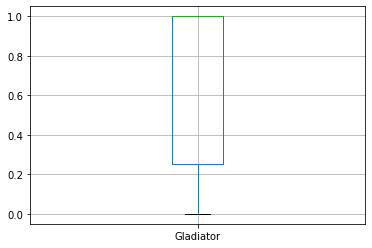

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
movies.boxplot(column=['Gladiator'])

<AxesSubplot:>

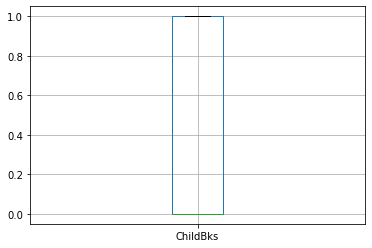

In [70]:
book.boxplot(column=['ChildBks'])

<AxesSubplot:>

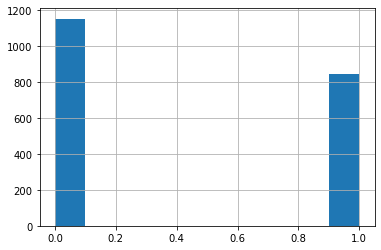

In [71]:
book['ChildBks'].hist()

<AxesSubplot:>

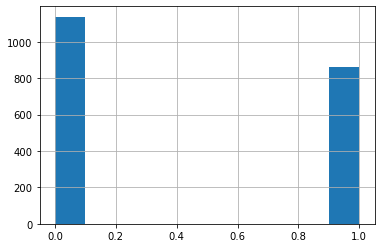

In [29]:
book['CookBks'].hist()

<AxesSubplot:>

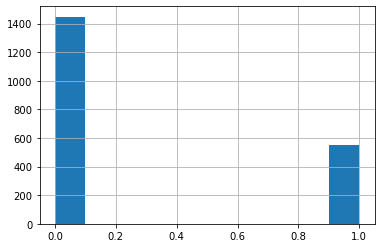

In [36]:
book['GeogBks'].hist()

(array([8., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

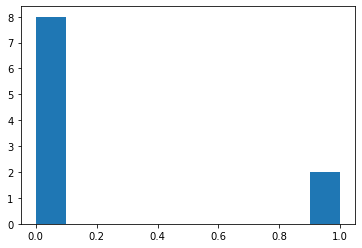

In [112]:
plt.hist(movies["Harry Potter2"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b3051539d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b305125670>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b3051b5970>],
 'medians': [<matplotlib.lines.Line2D at 0x1b30512d940>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b30512d340>],
 'means': []}

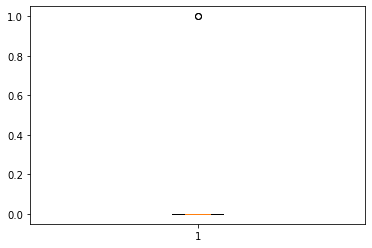

In [114]:
plt.boxplot(movies["Green Mile"],'bo')